In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
df=sns.load_dataset("Iris")

In [64]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [66]:
#df.drop(df["species"]=="setosa",axis=0,inplace=True)   ---->   not working
df_new=df[df["species"]!="setosa"]

In [67]:
df_new["species"].value_counts()

virginica     50
versicolor    50
Name: species, dtype: int64

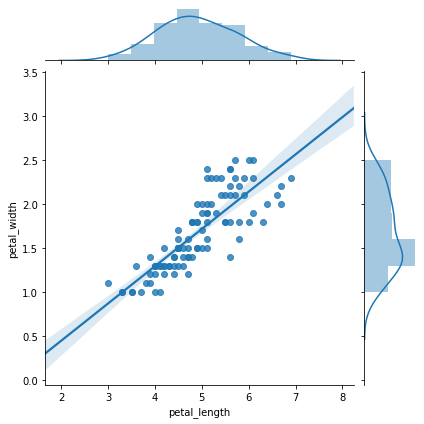

In [68]:
sns.jointplot(x="petal_length",y="petal_width",data=df_new,kind="reg")

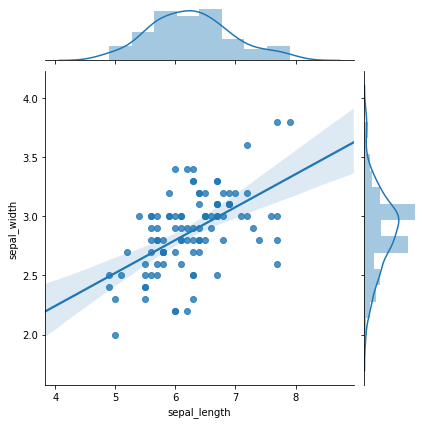

In [69]:
sns.jointplot(x="sepal_length",y="sepal_width",data=df_new,kind="reg")

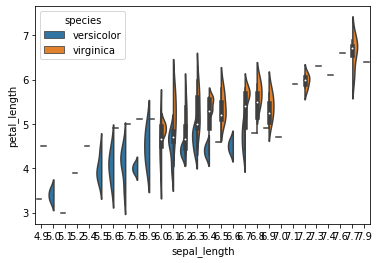

In [70]:
sns.violinplot(x="sepal_length",y="petal_length",data=df_new,hue="species",split=True)

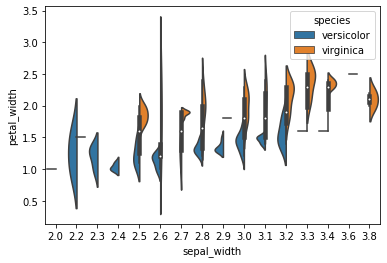

In [71]:
sns.violinplot(x="sepal_width",y="petal_width",data=df_new,hue="species",split=True)

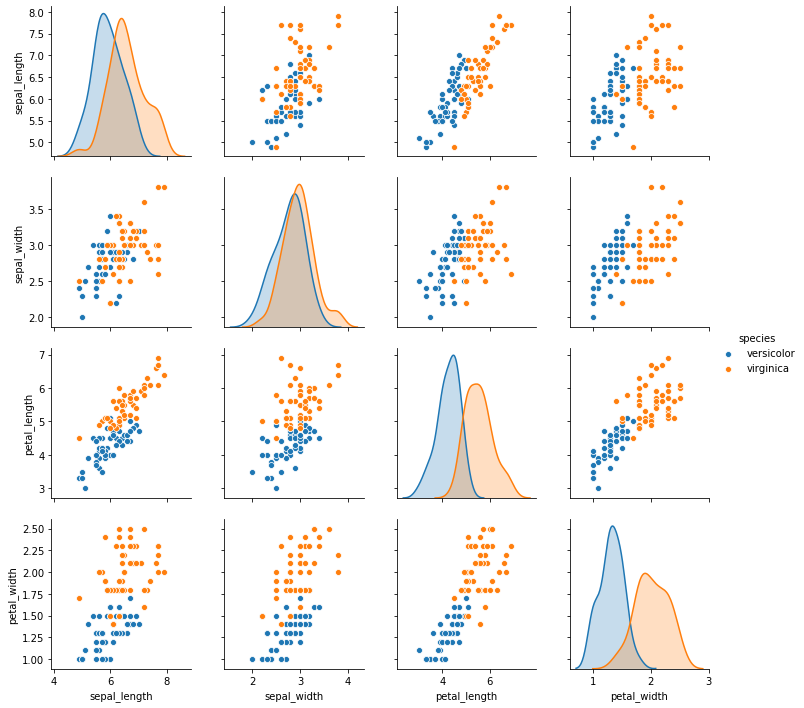

In [72]:
sns.pairplot(df_new,hue="species")

In [73]:
from sklearn.model_selection import train_test_split
X=df_new.drop("species",axis=1)
y=df_new["species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [74]:
from sklearn.svm import SVC

In [75]:
svc=SVC(gamma="auto")

In [76]:
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


[[14  1]
 [ 0 15]]
